# Data Analysis Report – FITNESS WATCH Dataset 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
file_path = "E:/generalstuffs/dap/dat analysis/FITNESS WATCH .xlsx"
df = pd.read_excel(file_path)
df.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [ ]:
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())

Dataset shape: (149, 8)
Column names: ['Date', 'Time', 'Step Count', 'Distance', 'Energy Burned', 'Flights Climbed', 'Walking Double Support Percentage', 'Walking Speed']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               149 non-null    datetime64[ns]
 1   Time                               149 non-null    object        
 2   Step Count                         149 non-null    int64         
 3   Distance                           149 non-null    float64       
 4   Energy Burned                      149 non-null    float64       
 5   Flights Climbed                    149 non-null    int64         
 6   Walking Double Support Percentage  149 non-null    float64       
 7   Walking Speed                      149 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [ ]:
df.describe()

,Date,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
count,149,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,2023-03-26 07:14:53.959731456,224.959732,0.147963,14.497933,2.463087,0.298470,3.973772
min,2023-03-21 00:00:00,1.000000,0.000460,0.171000,1.000000,0.261000,1.548000
25%,2023-03-22 00:00:00,22.000000,0.014020,12.621000,1.000000,0.279000,3.312000
50%,2023-03-26 00:00:00,89.000000,0.062900,14.422000,3.000000,0.295000,4.140000
75%,2023-03-29 00:00:00,365.000000,0.219000,15.441000,3.000000,0.317000,4.896000
max,2023-04-01 00:00:00,1082.000000,0.701180,60.514000,13.000000,0.354000,5.580000
std,NaN,277.919390,0.181177,9.607919,1.570520,0.022408,1.049368


In [8]:
df.isnull().sum()


Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [ ]:
correlation = df.corr(numeric_only=True)
correlation

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
Step Count,1.000000,0.973407,0.022331,0.104426,0.007245,-0.097849
Distance,0.973407,1.000000,0.020509,0.105045,0.001824,-0.105543
Energy Burned,0.022331,0.020509,1.000000,-0.068077,0.038986,-0.049147
Flights Climbed,0.104426,0.105045,-0.068077,1.000000,0.031024,0.026509
Walking Double Support Percentage,0.007245,0.001824,0.038986,0.031024,1.000000,-0.091186
Walking Speed,-0.097849,-0.105543,-0.049147,0.026509,-0.091186,1.000000


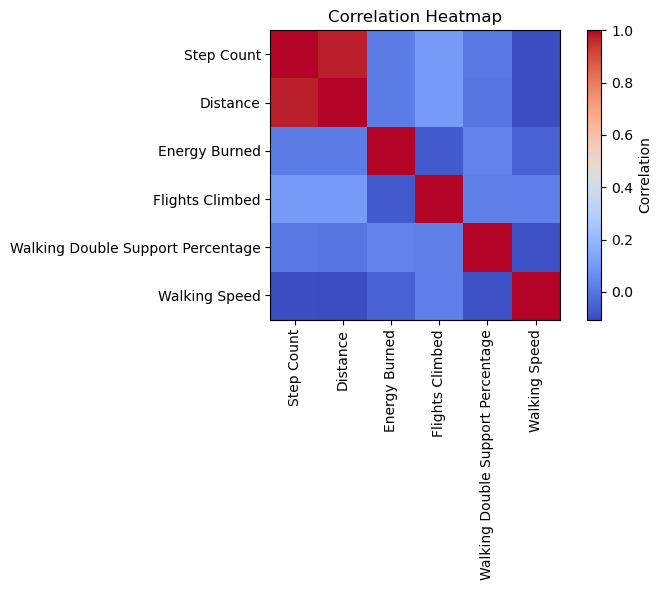

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label="Correlation")
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

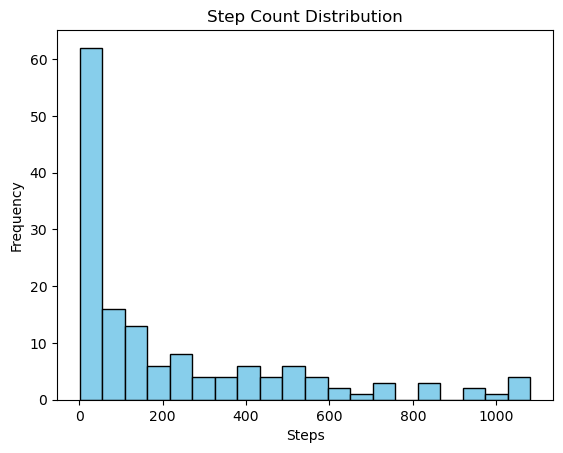

In [ ]:
plt.hist(df['Step Count'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Step Count Distribution")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

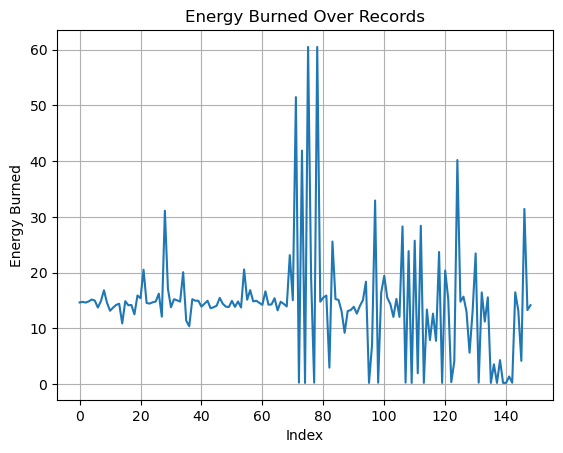

In [ ]:
plt.plot(df['Energy Burned'])
plt.title("Energy Burned Over Records")
plt.xlabel("Index")
plt.ylabel("Energy Burned")
plt.grid(True)
plt.show()

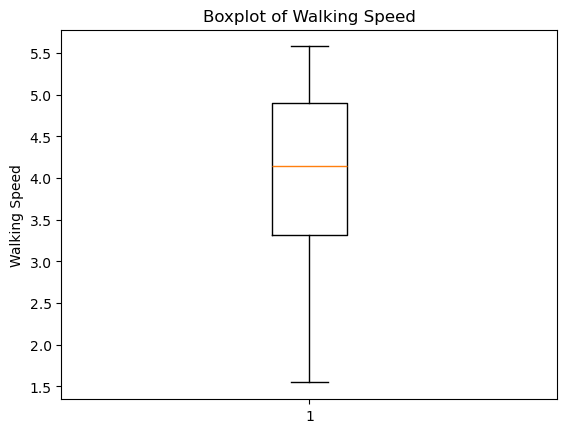

In [ ]:
plt.boxplot(df['Walking Speed'].dropna())
plt.title("Boxplot of Walking Speed")
plt.ylabel("Walking Speed")
plt.show()

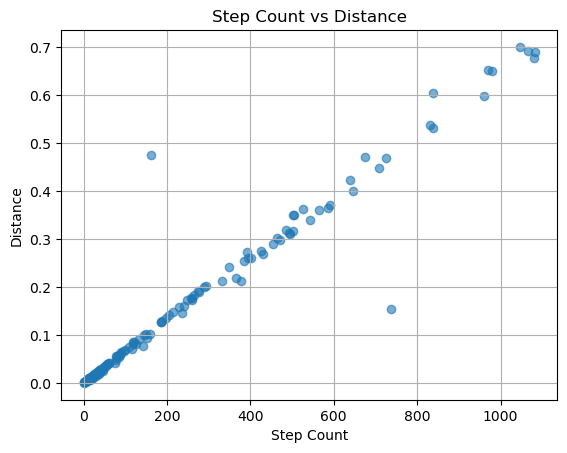

In [ ]:
plt.scatter(df['Step Count'], df['Distance'], alpha=0.6)
plt.title("Step Count vs Distance")
plt.xlabel("Step Count")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:
df.describe().to_csv("fitness_summary.csv")